In [1]:
# OS Library
import os    
# Waarning suppress
import warnings    
warnings.filterwarnings("ignore") 
# Python Built-in
import collections                         
import itertools                  
import re
# Data analysis
import numpy as np     
import pandas as pd     
# Visualization
import matplotlib.pyplot as plt     
plt.style.use('seaborn-poster')    
import seaborn as se     
# Library for map (choropleth)
import folium   
# Twitter authentication and Sentiment Analysis
import nltk
import tweepy                             
from textblob import TextBlob            
import tweepy
import re

In [2]:
api_twitter="mzpPNecgSp4pwCxIVpDJMwoKH"                                      # Twitter API key 
api_twitter_secret="yniu7QaUE8EHSna6k7OeTCvEJNfOWY9U42U3ADx6qGuWbmXC1z"      # Twitter API secret key 

In [3]:
token_twitter="1283907246498492416-qvDQ6JYvuoOLXjgUjDItKRvcMtzR7o"          # Twitter API token 
token_twitter_secret="h6YzwkqwsKSQ2gCUL98XpqZtgljNzl9d62tAeVBjudrrt"        # Twitter API token Secret 

In [4]:
tweet_auth=tweepy.OAuthHandler(api_twitter,api_twitter_secret)       
tweet_auth.set_access_token(token_twitter,token_twitter_secret)                # Twitter Authentication through tweepy
API=tweepy.API(tweet_auth)         # Gtwitter API

In [5]:
def cleaning_twts(raw):           
    raw = re.sub(r'@[A-Za-z0-9_]+', '', raw)
    raw = re.sub(r'#', '', raw)
    raw = re.sub(r'RT : ', '', raw)
    raw = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', raw)
    return raw

In [27]:
cursor_twpy = tweepy.Cursor(API.search,q=['COVID','Jobs'],lang='en',since='2018-01-01').items(1000) 
# cleantweetsing the Tweets 
cleantweets = [cleaning_twts(ts.text) for ts in cursor_twpy]
# Tweet obj_twect creation
obj_tw = [TextBlob(ts) for ts in cleantweets]     
# Creation of tweet polarity
plrty= [[ts.sentiment.polarity, str(ts)] for ts in obj_tw] 

In [30]:
pragati = pd.DataFrame({
    "Tweets":np.array(plrty).T[1],
    "Tweet_Polarity":np.array(np.array(plrty).T[0],float)
}) 
pragati.tail()


,Tweets,Tweet_Polarity
995,The Democrats’ number one priority is not:\n\n...,0.5
996,The Democrats’ number one priority is not:\n\n...,0.5
997,Sir kindly kasur district pa bhe nzar daal le...,0.3
998,The Democrats’ number one priority is not:\n\n...,0.5
999,The Democrats’ number one priority is not:\n\n...,0.5


In [29]:
len(pragati)

1000

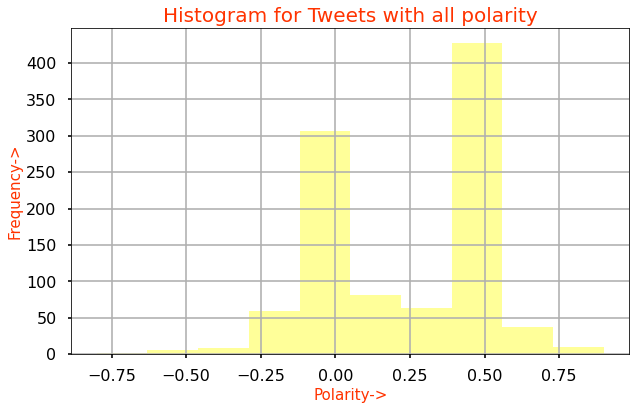

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
pragati.hist(bins=10,ax=ax,color="#FFFF99") 
plt.title("Histogram for Tweets with all polarity",fontsize=20,color="#FF3300")
plt.xlabel("Polarity->",fontsize=15,color="#FF3300")
plt.ylabel("Frequency->",fontsize=15,color="#FF3300")
plt.show()

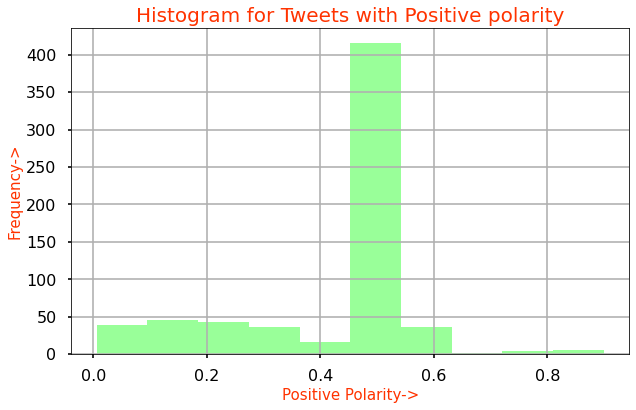

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
pragati[pragati['Tweet_Polarity']>0].hist(bins=10,ax=ax,color="#99FF99") 
plt.title("Histogram for Tweets with Positive polarity",fontsize=20,color="#FF3300")
plt.xlabel("Positive Polarity->",fontsize=15,color="#FF3300")
plt.ylabel("Frequency->",fontsize=15,color="#FF3300")
plt.show()

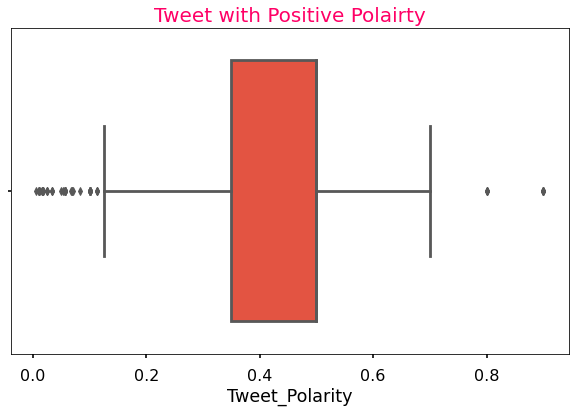

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Tweet with Positive Polairty",fontsize=20,color="#FF0066")
ax = se.boxplot(x=pragati[pragati['Tweet_Polarity']>0]["Tweet_Polarity"],palette='CMRmap_r')

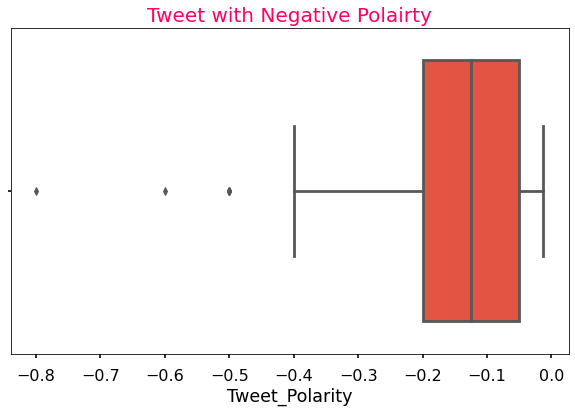

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Tweet with Negative Polairty",fontsize=20,color="#FF0066")
ax = se.boxplot(x=pragati[pragati['Tweet_Polarity']<0]["Tweet_Polarity"],palette='CMRmap_r')